In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.constraints import MaxNorm
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

seed =7
np.random.seed(seed)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))


model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))


model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(1024, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,915,114 (11.12 MB)

 Trainable params: 2,915,114 (11.12 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 525s 332ms/step - accuracy: 0.2963 - loss: 1.8661 - val_accuracy: 0.5380 - val_loss: 1.2829
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 574s 340ms/step - accuracy: 0.5534 - loss: 1.2431 - val_accuracy: 0.6452 - val_loss: 1.0009
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 539s 326ms/step - accuracy: 0.6365 - loss: 1.0367 - val_accuracy: 0.6643 - val_loss: 0.9463
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 550s 318ms/step - accuracy: 0.6703 - loss: 0.9404 - val_accuracy: 0.6886 - val_loss: 0.8685
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 505s 320ms/step - accuracy: 0.6941 - loss: 0.8622 - val_accuracy: 0.7087 - val_loss: 0.8438
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - accuracy: 0.7110 - loss: 0.8365
Test Accuracy: 0.7087


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


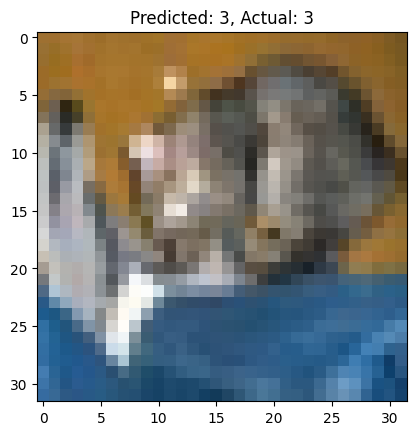

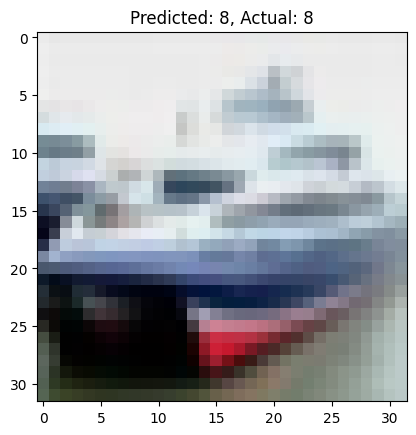

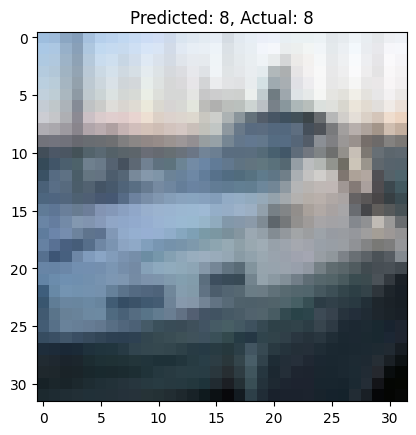

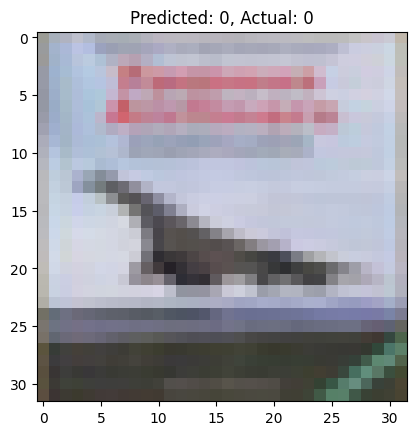

In [2]:
predictions = model.predict(x_test[:4])
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(y_test[:4], axis=1)

# Display the predictions and actual labels
for i in range(4):
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {predicted_labels[i]}, Actual: {actual_labels[i]}")
    plt.show()

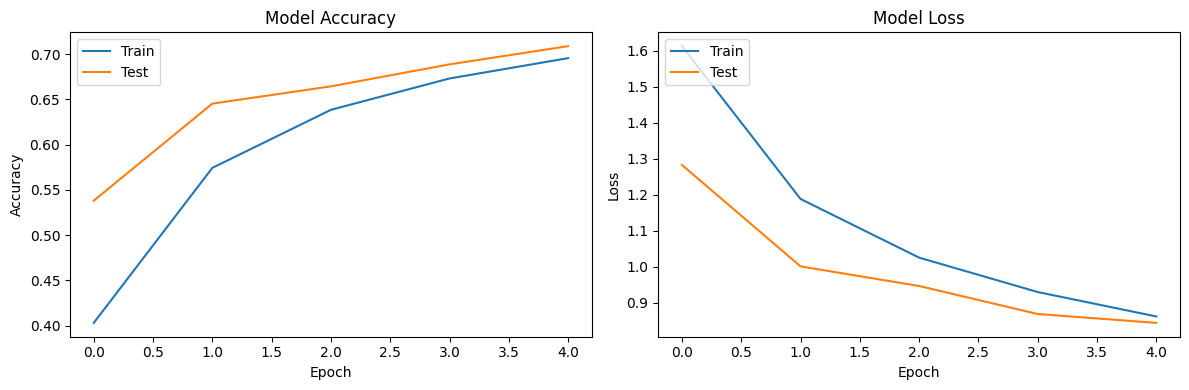

In [3]:
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()